# Store Sales Prediction 


In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import  tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

    

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.shape

(14204, 12)

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

### EDA:

Text(0.5, 1.0, 'Item_Outlet_Sales')

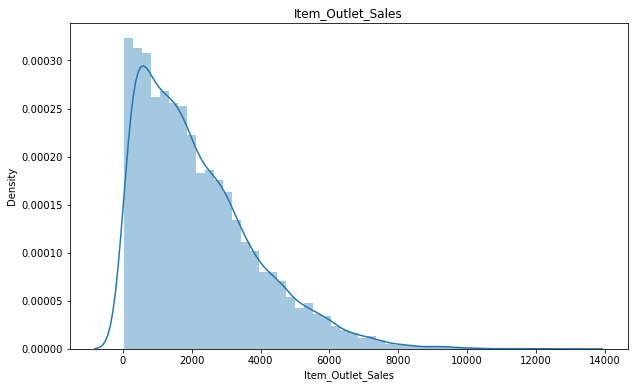

In [6]:
plt.figure(figsize = (10, 6))
sns.distplot(data['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')

Data is skewed towards right 

### Numerical columns

<AxesSubplot:xlabel='Item_Weight', ylabel='Count'>

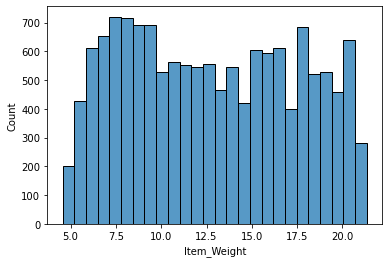

In [7]:
#Item_Weight 
sns.histplot(data.Item_Weight)

 There is no clear pattern in Item_Weight.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

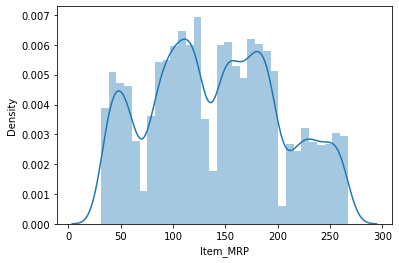

In [8]:
#MRP
sns.distplot(data.Item_MRP)

<AxesSubplot:xlabel='Item_MRP'>

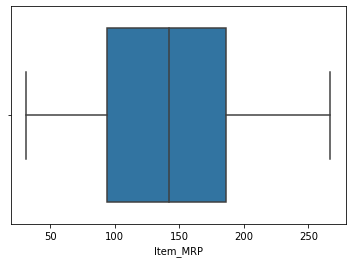

In [9]:
sns.boxplot(data.Item_MRP )

 There is no clear pattern in Item_MRP.

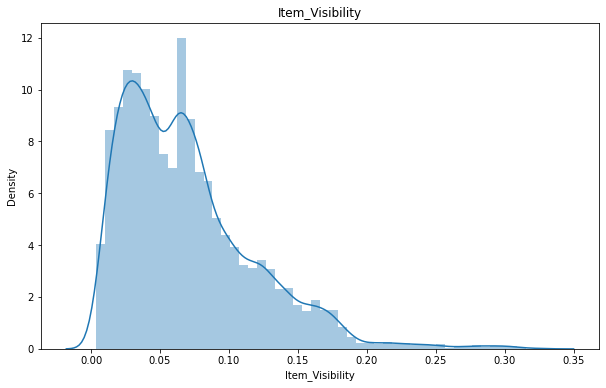

In [10]:
plt.figure(figsize = (10, 6))
sns.distplot(data['Item_Visibility']);
plt.title('Item_Visibility');

#We can infer from above graph that their are so many items which have lower visibility.

May be these items are placed behind something so they are not visible by the customers 

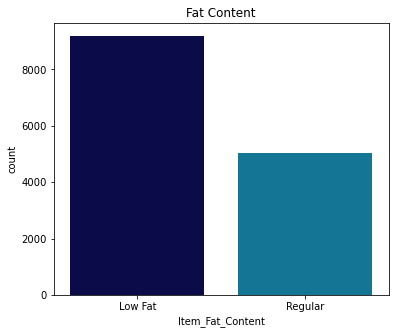

In [11]:
plt.figure(figsize=(6,5))
sns.countplot('Item_Fat_Content',data=data,palette='ocean')
plt.title('Fat Content');

In [12]:
def pie(data,column):    
    fig, ax = plt.subplots(1,1, figsize = (6, 5))
    data = column.value_counts()                                                                                        
    labels =data.keys()   
    plt.pie(x = data, autopct = "%.1f%%", labels = labels, pctdistance = 0.5);
    plt.title(column.name)

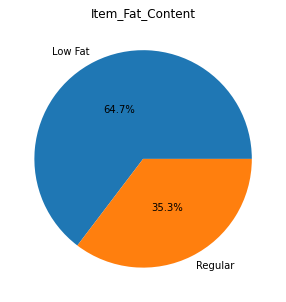

In [13]:
pie(data,data.Item_Fat_Content)

 We can infer from the above chart that most of the items have Low Fat content in them.
     64.7% of the items have Low Fat and about 35% have Regular Fat in them.

In [14]:
#Item_Type

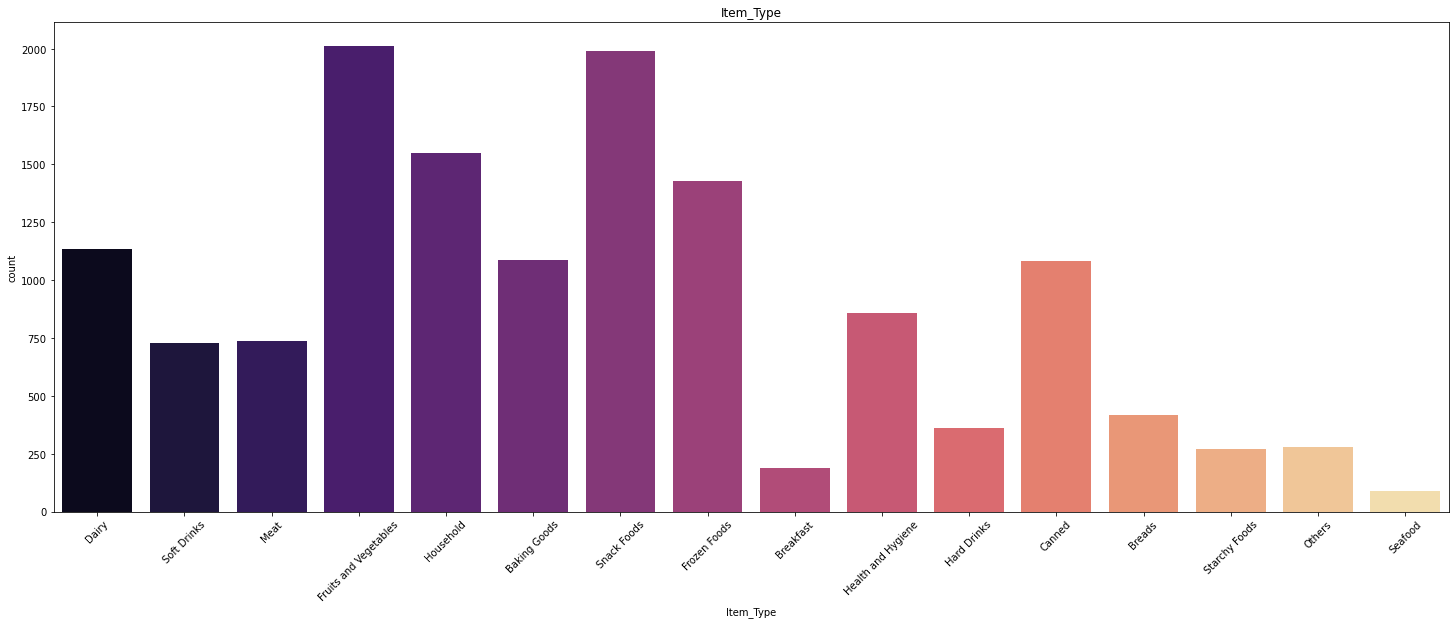

In [15]:
plt.figure(figsize=(25,9))
sns.countplot('Item_Type',data=data,palette='magma')
plt.xticks(rotation = 45);

plt.title('Item_Type');

 Fruits and Vegetables and snacks food are largely sold as people tend to use them on daily purpose.


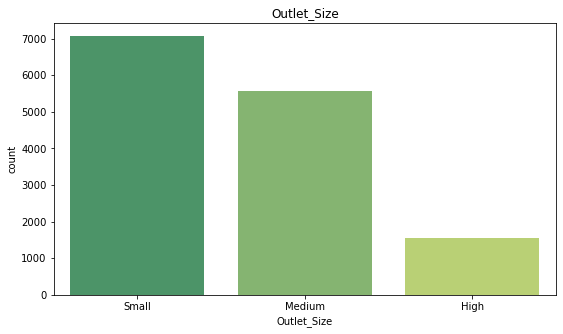

In [16]:
plt.figure(figsize=(9,5))
sns.countplot('Outlet_Size',data=data,palette='summer',order=['Small','Medium','High'])
plt.title('Outlet_Size');

We can infer from the above graph like most of the stores are of small type

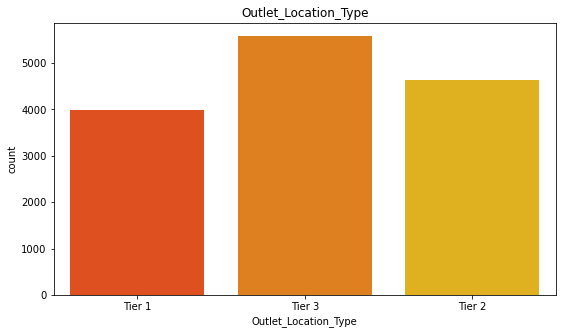

In [17]:
plt.figure(figsize=(9,5))
sns.countplot('Outlet_Location_Type',data=data,palette='autumn')
plt.title('Outlet_Location_Type');

 We can infer from above graph most of the outlets are present in tier 3

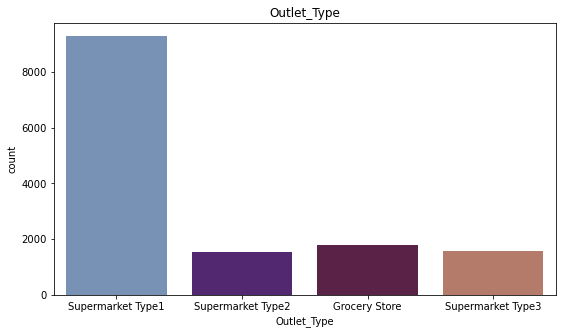

In [18]:
plt.figure(figsize=(9,5))
sns.countplot('Outlet_Type',data=data,palette='twilight')
plt.title('Outlet_Type');

We can infer from above graph most of the outlets are of supermarket type

In [19]:
data["Years_Established"]= data["Outlet_Establishment_Year"].apply(lambda x:2009-x)

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

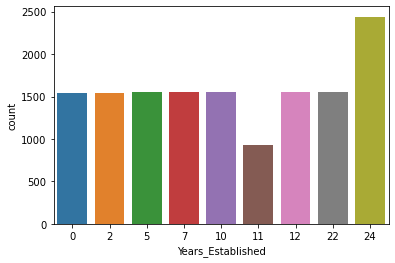

In [20]:

sns.countplot(x='Years_Established',data=data)

 More no.of the outlets are present which have higher established year

### Bivariate Analysis

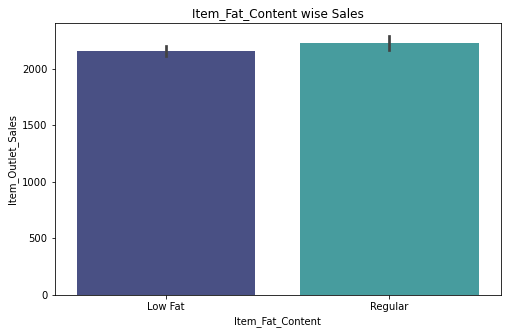

In [21]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=data,palette='mako')
plt.title('Item_Fat_Content wise Sales');

 The Item Outles sales are same for both Low Fat and Regular Item types

<Figure size 576x360 with 0 Axes>

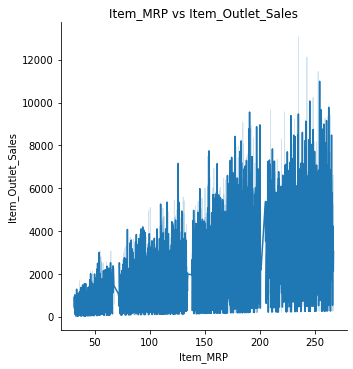

In [22]:
plt.figure(figsize=(8,5))
sns.relplot(data=data,x='Item_MRP',y='Item_Outlet_Sales',kind='line');
plt.title('Item_MRP vs Item_Outlet_Sales');

 Items MRP ranging from 200-250 is having high Sales.

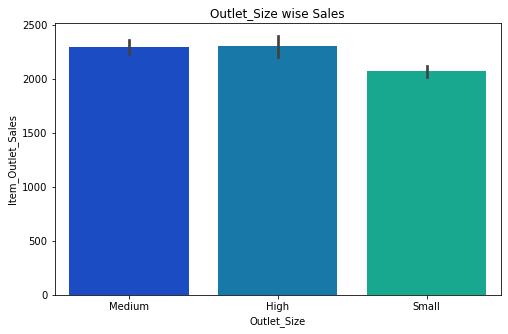

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,palette='winter');
plt.title('Outlet_Size wise Sales');

Basically all the outlet size having almost same sales

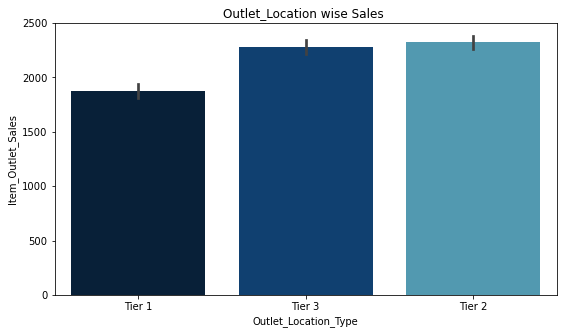

In [24]:
plt.figure(figsize=(9,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,palette='ocean');
plt.title('Outlet_Location wise Sales ');

The Outlet Sales tend to be high for Tier3 and Tier 2 location type

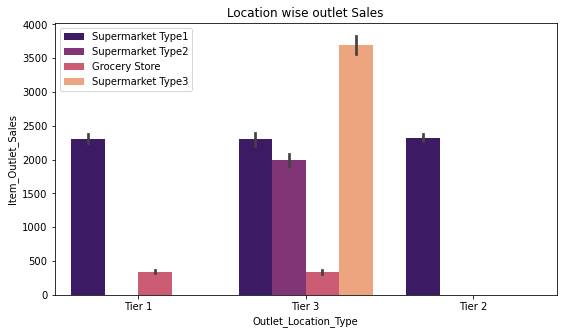

In [25]:
plt.figure(figsize=(9,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
plt.title('Location wise outlet Sales')
plt.legend();

### Observations:
Tier-3 location type have more no. stores present and sales is also high

<Figure size 576x432 with 0 Axes>

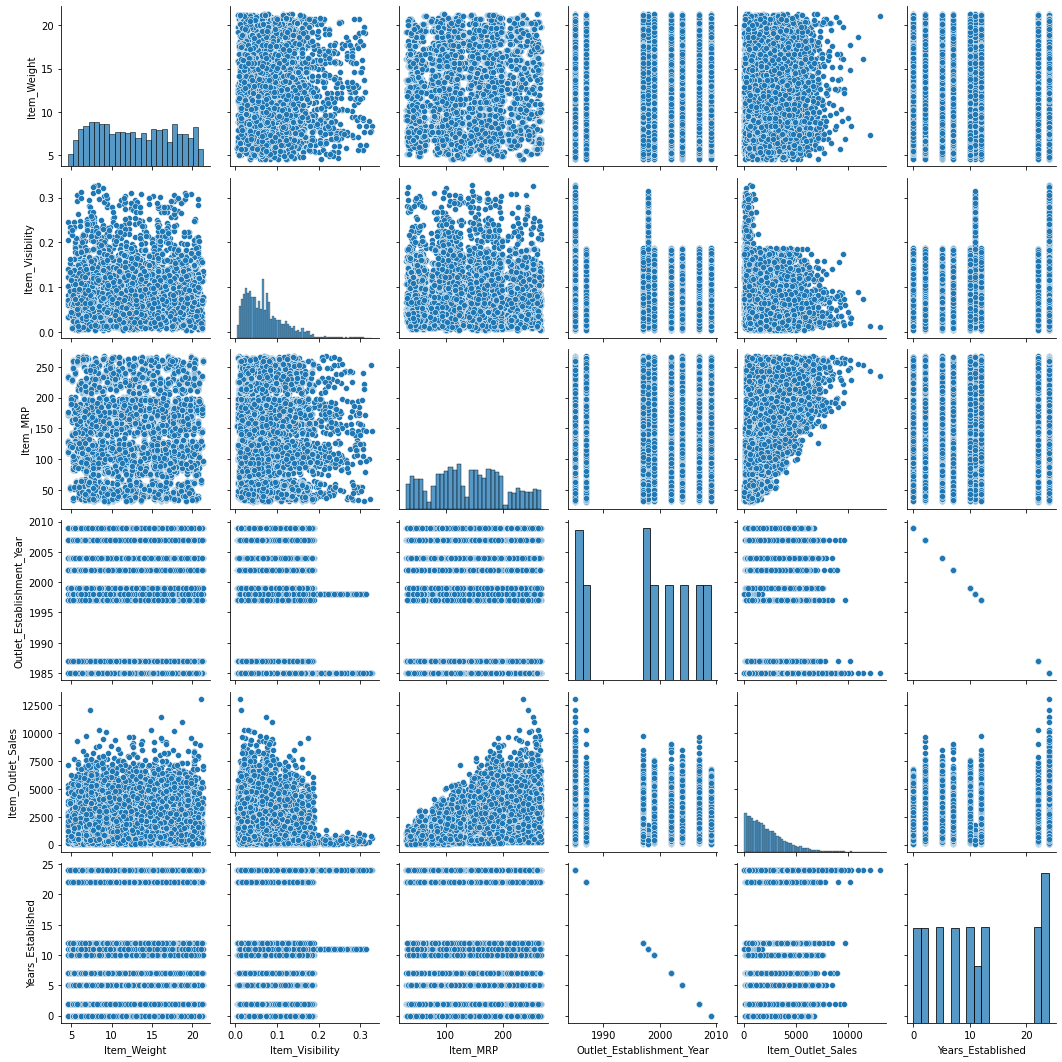

In [26]:
plt.figure(figsize=(8,6))
sns.pairplot(data)

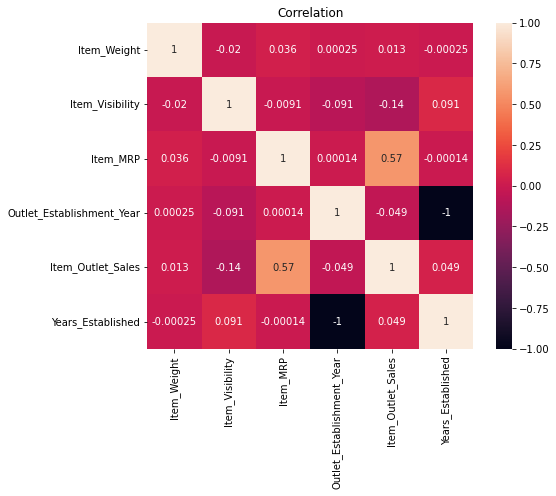

In [27]:
corrmat = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, annot=True, square=True)
plt.title('Correlation');

There is no significant correlation except Item_MRP and Item_Outlet_Sales as the MRP of items increases the sales is also increasing.

### Data Cleaning and Missing Value Imputation

In [28]:
data.dropna(inplace=True)

In [29]:
#dt=data.copy()
df=data.copy()


In [30]:
#df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].fillna(df.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('mean'))


In [31]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Years_Established            0
dtype: int64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

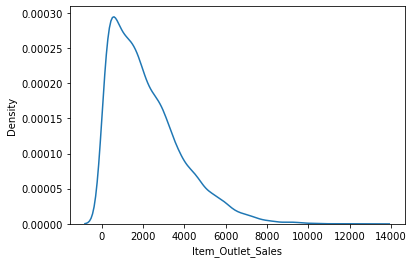

In [32]:
sns.distplot(data['Item_Outlet_Sales'],hist=False)

#### Encoding Categorical Variables
Label Encoding and One Hot Encoding.

Label encoding simply means converting each category in a variable to a number.

In One hot encoding, each category of a categorical variable is converted into a new binary column (0/1).

In [33]:
encode = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet_Identifier']
label_encoder = preprocessing.LabelEncoder()
for i in encode:
    df[i]=label_encoder.fit_transform(df[i])

In [34]:
df = pd.get_dummies(df, columns=['Outlet_Location_Type','Outlet_Size','Item_Fat_Content','Outlet_Type','Outlet_Identifier'])


In [35]:
df.drop(['Outlet_Establishment_Year'],inplace=True,axis=1)

In [36]:
df.dtypes

Item_Identifier             int32
Item_Weight               float64
Item_Visibility           float64
Item_Type                   int32
Item_MRP                  float64
Item_Outlet_Sales         float64
Years_Established           int64
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Outlet_Identifier_0         uint8
Outlet_Identifier_1         uint8
Outlet_Identifier_2         uint8
Outlet_Identifier_3         uint8
Outlet_Identifier_4         uint8
Outlet_Identifier_5         uint8
Outlet_Identifier_6         uint8
Outlet_Identifier_7         uint8
Outlet_Identifier_8         uint8
Outlet_Identifier_9         uint8
dtype: object

In [37]:
#a=data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()
#data['Item_Outlet_Sales']=data['Item_Outlet_Sales'].fillna(data.groupby('Outlet_Type')['Item_Outlet_Sales'].transform('mean'))

#if data.Outlet_Identifier=='OUT010':
#    data.Item_Outlet_Sales

In [38]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Years_Established            0
dtype: int64

In [118]:
lst=['Item_Identifier','Item_Weight','Item_Type','Item_MRP','Item_Outlet_Sales']
scale=MinMaxScaler()
df[lst]=scale.fit_transform(df[lst])

<AxesSubplot:>

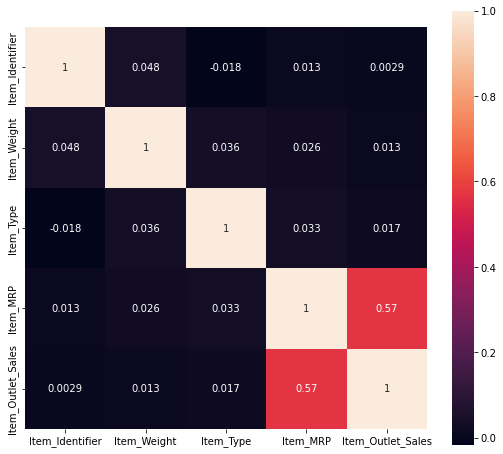

In [40]:

plt.figure(figsize=(9, 8))
sns.heatmap(df[['Item_Identifier','Item_Weight','Item_Type','Item_MRP','Item_Outlet_Sales']].corr(), annot=True, square=True)

In [41]:
df.shape

(8523, 29)

## Model Building

In [159]:
X=np.array(df.loc[:,df.columns !='Item_Outlet_Sales']).reshape((-1, 28))
y=np.array(df['Item_Outlet_Sales']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Linear regression

In [43]:
r2=[];rmse=[];names=[];cv=[]

In [44]:
lr = LinearRegression().fit(X_train, y_train)
scorelr=lr.score(X_train, y_train)
y_pred_lr = lr.predict(X_test)
RMSElr=np.sqrt(mean_squared_error(y_test, y_pred_lr)).round(4)
scorelrt=lr.score(X_test, y_test).round(4)*100
r2.append(scorelrt)
rmse.append(RMSElr)
names.append('Linear Regression')
print('score',scorelrt)
print('RMSE',RMSElr)

score 56.97
RMSE 0.0841


In [45]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
cvlr=cross_val_score(LinearRegression(), X, y, cv= kf, scoring="r2").mean().round(4)*100
cv.append(cvlr)

### DecisionTreeRegressor

In [46]:
dtm = DecisionTreeRegressor(max_depth=5,min_samples_split=5,max_leaf_nodes=10)

dtm1=dtm.fit(X_train,y_train)
scoredtr=dtm1.score(X_train,y_train).round(4)*100
scoredt=dtm1.score(X_test,y_test).round(4)*100

print("R-Squared ",scoredt)
y_pred_dt=dtm1.predict(X_test)
rmsedt=np.sqrt(mean_squared_error(y_test,y_pred_dt)).round(4)
print('RMSE',rmsedt)
r2.append(scoredt)
rmse.append(rmsedt)
names.append('Decision Tree Regression')

R-Squared  58.24
RMSE 0.0829


In [47]:
#cross-validate
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="r2")
    print(f'For max depth: {val}')
    print('Score: ',score.mean().round(5)*100)

For max depth: 1
Score:  23.334
For max depth: 2
Score:  43.038
For max depth: 3
Score:  52.205999999999996
For max depth: 4
Score:  57.769000000000005
For max depth: 5
Score:  59.111999999999995
For max depth: 6
Score:  58.238
For max depth: 7
Score:  57.248
For max depth: 8
Score:  55.913999999999994
For max depth: 9
Score:  53.552
For max depth: 10
Score:  50.968


In [48]:
cvdt=cross_val_score(tree.DecisionTreeRegressor(max_depth=5, random_state= 42), X, y, cv= kf, scoring="r2").mean().round(6)*100
cv.append(cvdt)

### Random Forest Regressor(bagging)

In [49]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True).fit(X_train, y_train)
scorer=model.score(X_train,y_train).round(3)*100
y_predr=model.predict(X_test)
RMSER=np.sqrt(mean_squared_error(y_test,y_predr)).round(4)
print(scorer)
print(RMSER)


61.199999999999996
0.0808


In [50]:
r2.append(scorer)
rmse.append(RMSER)
names.append('Random Forest Regression')

In [51]:
#cross-validate
max_depth = [1,2,3,4,5,6,7,8]
for val in max_depth:
    score = cross_val_score(RandomForestRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="r2")
    print(f'For max depth: {val}')
    print('score: ',score.mean().round(4)*100)

For max depth: 1
score:  24.62
For max depth: 2
score:  45.51
For max depth: 3
score:  53.959999999999994
For max depth: 4
score:  58.919999999999995
For max depth: 5
score:  59.74
For max depth: 6
score:  59.760000000000005
For max depth: 7
score:  59.69
For max depth: 8
score:  59.56


In [52]:
cvrf=cross_val_score(RandomForestRegressor(max_depth=6, random_state= 42), X, y, cv= kf, scoring="r2").mean().round(2)*100
cv.append(cvrf)

In [53]:
#hyperparameter tunning (grid search)

In [54]:
params = {
    'max_depth': [2,5,7,9],
    'min_samples_leaf': [5,20,50,100],
    'n_estimators': [10,30,50,100]
}

In [55]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,param_grid=params,cv = 4,n_jobs=-1, verbose=1, scoring="r2")

In [56]:
%%time
grid_search.fit(X_train, y_train);

Fitting 4 folds for each of 64 candidates, totalling 256 fits
CPU times: total: 1.58 s
Wall time: 41.9 s


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(max_depth=5, n_jobs=-1,
                                             oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 9],
                         'min_samples_leaf': [5, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='r2', verbose=1)

In [57]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=30,
                      n_jobs=-1, oob_score=True, random_state=42)

In [58]:
y_predt=grid_search.predict(X_test)
y_predt

array([0.09345457, 0.05141824, 0.05141824, ..., 0.03528567, 0.15636112,
       0.30215493])

In [59]:
gridr2=grid_search.best_score_.round(5)*100
gridr2

59.534

In [60]:
rmsegrid=np.sqrt(mean_squared_error(y_test,y_predt))
rmsegrid

0.08109161422498691

In [61]:
#r2.append(gridr2)
#rmse.append(rmsegrid)
#names.append('Grid Search')

### AdaBoostRegressor(Boosting)

In [62]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(random_state=42).fit(X_train, y_train)
scoreab=model.score(X_test,y_test).round(3)*100
y_predab=model.predict(X_test)
RMSEAB=np.sqrt(mean_squared_error(y_test,y_predab)).round(4)
print(scoreab)
print(RMSEAB)
# evaluate the model
r2.append(scoreab)
rmse.append(RMSEAB)
names.append('AdaBoostRegressor')

# report performance
#print('score: ',n_scores.mean().round(4)*100)
#print('score: ',rmseada.mean().round(4))

46.0
0.0942


In [63]:
cvab= cross_val_score(model, X,y, scoring='r2', n_jobs=-1,cv=kf,error_score='raise').mean().round(2)*100
cv.append(cvab)

In [64]:
#print(clf.score(X_train,y_train))

### Stacking

In [65]:
def get_stacking():
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('rfr', RandomForestRegressor()))
    level0.append(('abr', AdaBoostRegressor()))

    # define meta learner model
    level1 = LinearRegression().fit(X_train,y_train)
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [66]:
model = get_stacking()

# evaluate the model
#cv = KFold(n_splits=5)

n_scores = cross_val_score(model, X_test,y_test, scoring='r2', cv=kf, n_jobs=-1, error_score='raise')
#rmsest = cross_val_score(model, X_test,y_test, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1, error_score='raise')

#r2.append(n_scores.mean().round(4)*100)
#rmse.append(rmsest.mean().round(4))
#names.append('stacking')

# report performance
print('Score: %.3f' % (n_scores.mean()*100))
#print('rmse: ',rmsest.mean().round(4))

Score: 57.903


In [67]:
final_rmse=pd.DataFrame(list(zip(names,rmse)),columns=['Algorithm','RMSE']).set_index('Algorithm').sort_values(by='RMSE',ascending=False)
final_r2=pd.DataFrame(list(zip(names,r2)),columns=['Algorithm','R2']).set_index('Algorithm').sort_values(by='R2',ascending=False)
final_cv=pd.DataFrame(list(zip(names,cv)),columns=['Algorithm','Cross_Validation']).set_index('Algorithm').sort_values(by='Cross_Validation',ascending=False)

In [68]:
final_r2

,R2
Algorithm,
Random Forest Regression,61.20
Decision Tree Regression,58.24
Linear Regression,56.97
AdaBoostRegressor,46.00


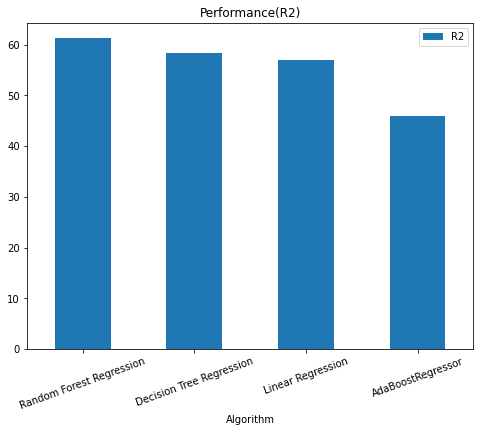

In [69]:
final_r2.plot(kind='bar',figsize=(8,6))
plt.xticks(rotation = 20);
plt.title('Performance(R2)');

In [70]:
final_rmse

,RMSE
Algorithm,
AdaBoostRegressor,0.0942
Linear Regression,0.0841
Decision Tree Regression,0.0829
Random Forest Regression,0.0808


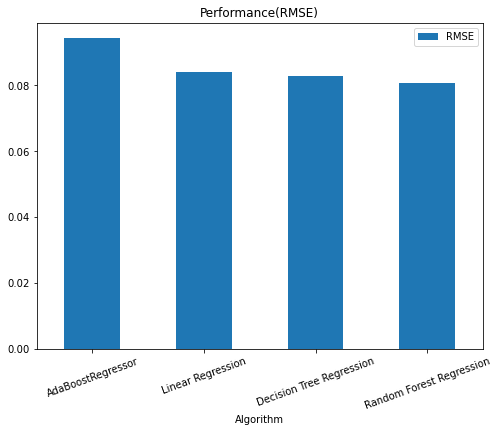

In [71]:
final_rmse.plot(kind='bar',figsize=(8,6))
plt.xticks(rotation = 20);
plt.title('Performance(RMSE)');

In [113]:
pred=pd.DataFrame({'actual':y_test.flatten(),'Predicted':y_predr.flatten()})

In [176]:
#a=np.array(y_test).reshape(-1,1)
#y_predrs=scale.inverse_transform(a)
#y_testrs=scale.inverse_transform(np.reshape(y_pred,(-1,1)))



In [160]:
y_test.shape

(2557, 1)

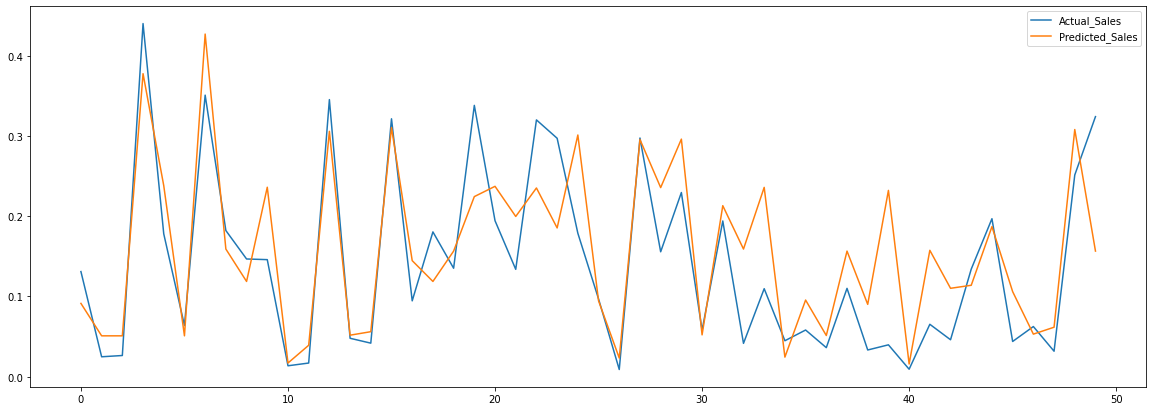

In [74]:

plt.figure(figsize=(20,7))
plt.plot(pred.actual[:50],label='Actual_Sales')
plt.plot(pred.Predicted[:50],label='Predicted_Sales')
plt.legend()
plt.show()

In [178]:
pd.concat([final_r2,final_cv],axis=1)

,R2,Cross_Validation
Algorithm,,
Random Forest Regression,61.20,60.0000
Decision Tree Regression,58.24,59.1123
Linear Regression,56.97,56.1500
AdaBoostRegressor,46.00,45.0000
